In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [40]:
# feature1 = length
# feature2 = width

'''''''''
danana :
standard deviation of banana was 8
normal distribution data with  ,  4 as the center value  &   0.6 as the standard deviation

apple:
apple length width ratio is balanced.

Three pandas datasets are generated, which are bananas, apples and fruits containing bananas and apples. Each dataset contains 1000 bananas and apples.
Each dataset contains a class. Banana classification is represented by the number 0 and apple is represented by the number 1.
'''''



'\ndanana :\nstandard deviation of banana was 8\nnormal distribution data with  ,  4 as the center value  &   0.6 as the standard deviation\n\napple:\napple length width ratio is balanced.\n\nThree pandas datasets are generated, which are bananas, apples and fruits containing bananas and apples. Each dataset contains 1000 bananas and apples.\nEach dataset contains a class. Banana classification is represented by the number 0 and apple is represented by the number 1.\n'

In [41]:
'''''''''
build the dataset
'''''''''

np.random.seed(121)

N = 1000
std = 0.6
bananas = pd.DataFrame({
    'length': np.random.normal(8, std, N),
    'width': np.random.normal(4, std, N),
    'class': np.zeros(N, dtype='int')}
)

apples = pd.DataFrame({
    'length': np.random.normal(6, std, N),
    'width': np.random.normal(6, std, N),
    'class': np.ones(N, dtype='int')}
)

fruits = pd.concat([bananas, apples])

print(apples)
print("\n")
print(bananas)

       length     width  class
0    6.280259  7.291050      1
1    6.310156  6.772268      1
2    5.996524  4.920935      1
3    5.108846  6.013289      1
4    6.454588  6.774234      1
..        ...       ...    ...
995  6.278997  5.833322      1
996  5.144364  5.553761      1
997  6.238845  5.984817      1
998  6.638805  6.437810      1
999  7.223785  5.527824      1

[1000 rows x 3 columns]


       length     width  class
0    7.872780  3.756298      0
1    7.829042  3.954792      0
2    7.655661  4.182660      0
3    7.735814  3.209214      0
4    7.801934  4.040239      0
..        ...       ...    ...
995  7.694339  4.320755      0
996  7.173906  5.291349      0
997  7.804548  3.698124      0
998  8.507925  3.955075      0
999  8.125014  3.534326      0

[1000 rows x 3 columns]


Text(0, 0.5, 'Width')

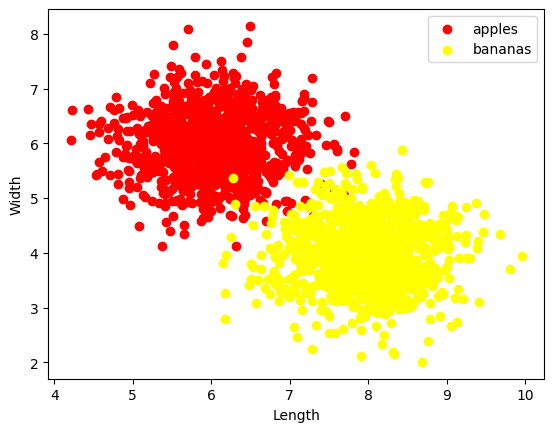

In [42]:
plt.scatter(x=apples['length'] , y=apples['width'] , label='apples' , color="red")
plt.scatter(x=bananas['length'], y=bananas['width'], label='bananas', color="yellow")
plt.legend()
plt.xlabel('Length')
plt.ylabel('Width')

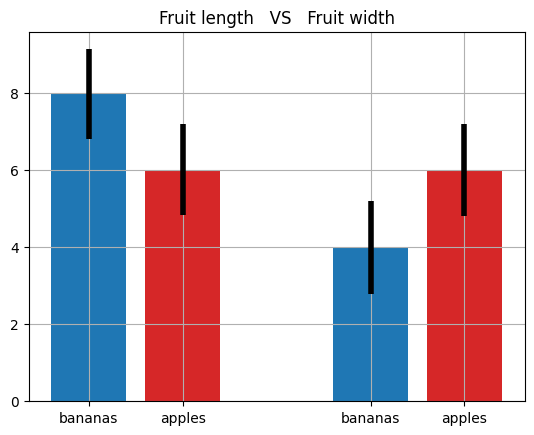

In [43]:
labels = ['bananas', 'apples', 'bananas', 'apples']
x = [1, 1.5, 2.5, 3.0]

height = [fruits.loc[fruits['class'] == 0, 'length'].mean(),
          fruits.loc[fruits['class'] == 1, 'length'].mean(),
          fruits.loc[fruits['class'] == 0, 'width' ].mean(),
          fruits.loc[fruits['class'] == 1, 'width' ].mean()]

yerr = [2*fruits.loc[fruits['class'] == 0, 'length'].std(),
        2*fruits.loc[fruits['class'] == 1, 'length'].std(),
        2*fruits.loc[fruits['class'] == 0, 'width' ].std(),
        2*fruits.loc[fruits['class'] == 1, 'width' ].std()]

color = ['tab:blue', 'tab:red', 'tab:blue', 'tab:red']

plt.bar(x=x , height=height, color=color, width=0.4,  error_kw={'lw': 4},   yerr=yerr)
plt.xticks(ticks=x, labels=labels)
plt.title('Fruit length   VS   Fruit width')
plt.grid()

Text(0.5, 1.0, 'Length Distribution ')

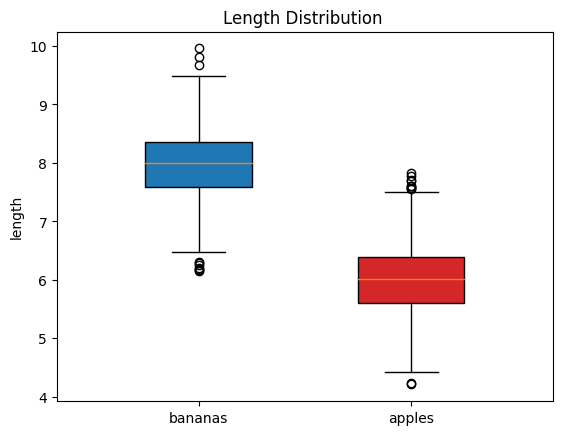

In [44]:
fea = 'length'
plt.boxplot(x=fea, data=fruits.loc[fruits['class'] == 0],
            patch_artist=True, boxprops={'facecolor': 'tab:blue'},
            positions=[0], labels=['bananas'], widths=[0.15])
plt.boxplot(x=fea, data=fruits.loc[fruits['class'] == 1],
            patch_artist=True, boxprops={'facecolor': 'tab:red'},
            positions=[0.3], labels=['apples'], widths=[0.15])
plt.ylabel('length')
plt.xlim(-0.2, 0.5)
plt.title('Length Distribution ')

Text(0.5, 0, 'Width')

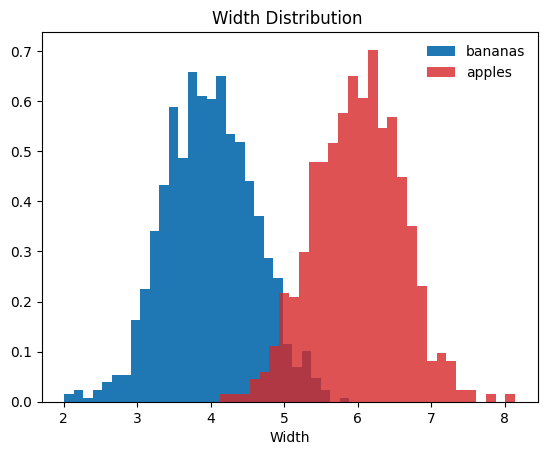

In [45]:
feature = 'width'

plt.hist(x=feature , data=fruits.loc[fruits['class'] == 0],
         bins=30, density=True, color='tab:blue', label='bananas',)
plt.hist(x=feature , data=fruits.loc[fruits['class'] == 1],
         bins=30, density=True, color='tab:red', label='apples', alpha=0.8)
plt.legend(frameon=False)
plt.title('Width Distribution ')
plt.xlabel('Width')

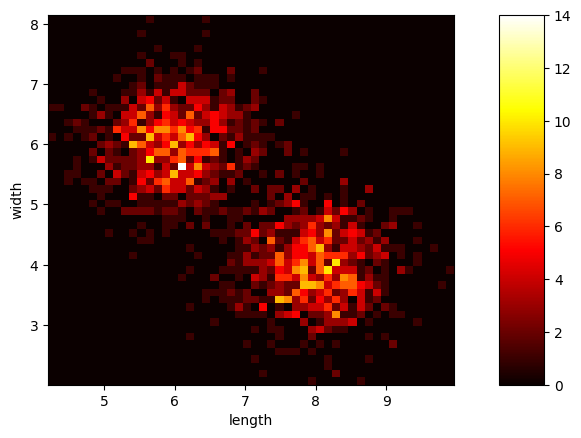

In [46]:
fig, (ax, cax) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [0.9, 0.1]})
_, _, _, mappable = ax.hist2d(
    x='length', y='width', bins=50, data=fruits, cmap=plt.cm.hot)
ax.set_xlabel('length')
ax.set_ylabel('width')

plt.colorbar(mappable=mappable, cax=cax, ax=ax)

Text(0.5, 0, 'L/W ratio')

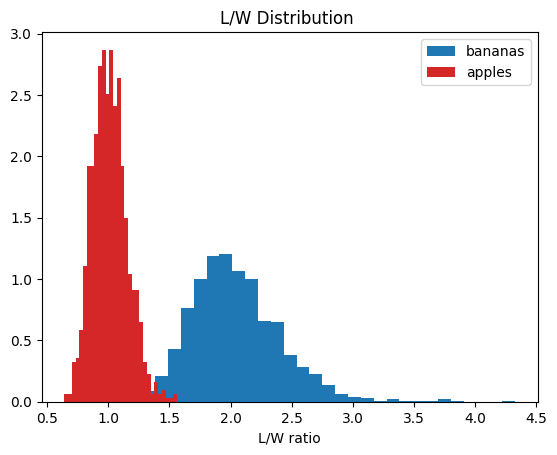

In [47]:
feature = 'L/W'
fruits[feature] = fruits['length']/fruits['width']

plt.hist(x=feature, data=fruits.loc[fruits['class'] == 0],
         bins=30, density=True, color='tab:blue', label='bananas',)
plt.hist(x=feature, data=fruits.loc[fruits['class'] == 1],
         bins=30, density=True, color='tab:red', label='apples',)
plt.legend()
plt.title('L/W Distribution ')
plt.xlabel('L/W ratio')

Text(0.5, 0, 'Area')

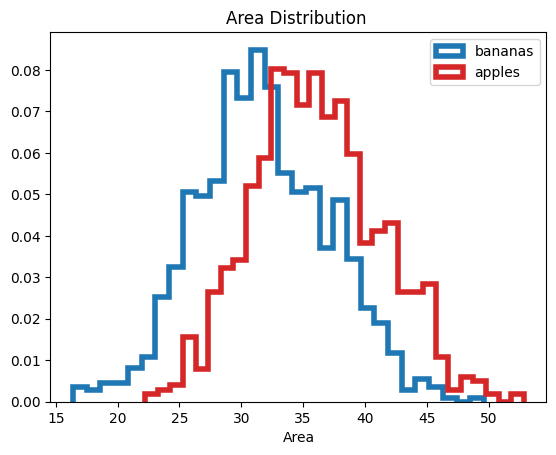

In [48]:
feature = 'area'
fruits[feature] = fruits['length']*fruits['width']
plt.hist(x=feature, data=fruits.loc[fruits['class'] == 0], histtype='step', lw=4,
         bins=30, density=True, color='tab:blue', label='bananas')
plt.hist(x=feature, data=fruits.loc[fruits['class'] == 1], histtype='step', lw=4,
         bins=30, density=True, color='tab:red', label='apples')
plt.title('Area Distribution ')
plt.legend()
plt.xlabel('Area')

In [50]:
from scipy import stats

feature = 'L/W'
fruits[feature] = fruits['length']/fruits['width']
stats.ttest_ind(fruits.loc[fruits['class'] == 0, feature],
                fruits.loc[fruits['class'] == 1, feature])

Ttest_indResult(statistic=82.43842566108299, pvalue=0.0)

In [52]:
feature = 'circumference'
fruits[feature] = 2*(fruits['length']+fruits['width'])
stats.ttest_ind(fruits.loc[fruits['class'] == 0, feature],
                fruits.loc[fruits['class'] == 1, feature])

Ttest_indResult(statistic=-1.3170522756675043, pvalue=0.1879721312693096)

In [54]:
print(fruits)

       length     width  class       L/W       area  circumference
0    7.872780  3.756298      0  2.095888  29.572510      23.258157
1    7.829042  3.954792      0  1.979635  30.962233      23.567669
2    7.655661  4.182660      0  1.830333  32.021024      23.676641
3    7.735814  3.209214      0  2.410501  24.825883      21.890056
4    7.801934  4.040239      0  1.931058  31.521676      23.684345
..        ...       ...    ...       ...        ...            ...
995  6.278997  5.833322      1  1.076402  36.627411      24.224638
996  5.144364  5.553761      1  0.926285  28.570569      21.396250
997  6.238845  5.984817      1  1.042445  37.338348      24.447325
998  6.638805  6.437810      1  1.031221  42.739366      26.153230
999  7.223785  5.527824      1  1.306804  39.931815      25.503219

[2000 rows x 6 columns]
